# <center> Treaty Game: Functions and Parameters

## 1. Income functions:

$\textbf{For natives}$:
         $$\large I_n = \frac{A_1}{1+e^{(-B_1*(L_n - C_1))}} -  \frac{A_1}{1+e^{(B_1*C_1)}}$$
where $A_1, B_1,$ and $C_1$ are parameters. $L_n$ is the land owned by the native.

$\textbf{For settlers}$:
         $$\large I_s = \frac{A_2}{1+e^{(-B_2*(L_s - C_2))}} -  \frac{A_2}{1+e^{(B_2*C_2)}}$$
where $A_2, B_2,$ and $C_2$ are parameters. $L_s$ is the land owned by the settler.

$\textbf{Note}:$ It always has $L_s + L_n = 100.$

## 2. Expansion functions

$\textbf{For natives}$:
         $$\large E_n = \frac{S_n^{(1-\gamma)}}{L_n+D}*(H-L_n)$$
where $\gamma, D$ and $H$ are parameters. $L_n$ is the land owned by the native. $S_n$ is the native's spending on expansion.

$\textbf{For settlers}$:
         $$\large E_s = \frac{S_s^{(1-\beta)}}{L_s+D+E}*(H-L_s)$$
where $\beta, D, E$ and $H$ are parameters. $L_s$ is the land owned by the settler. $S_s$ is the settler's spending on expansion.

$\textbf{Note:}$ The land change for the native is $L_n + E_n - E_s$. For the settler, it is $L_s + E_s - E_n$.

## 3. Parameters and income plot
Below are the currently used parameters.

In [1]:
A1 = 120; B1 = 0.045; C1=18  # native's income
A2 = 180; B2 = 0.065; C2=40  # settler's income

gamma = 0.5         # native's expansion
beta = 0.5; E = 100  # settler's expansion
D = 0; H = 150      # common params for both 

# another two parameters
prob = 1/6      # probability of ending the game in each period.
n_default = 10  # default periods without uncertainty at the beginning of the game

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Income(land, params):
    A, B, C = params
    left = A/(1+np.exp(-B*(land-C)))
    right = A/(1+np.exp(B*C))
    return left - right

In [3]:
land = np.linspace(0, 100, 100)
I_n = Income(land, [A1, B1, C1])
I_s = Income(100 - land, [A2, B2, C2])
Total_income = I_n + I_s

Incomes = [I_n, I_s, Total_income]
Labels = ['Native', 'Settler', 'Total']

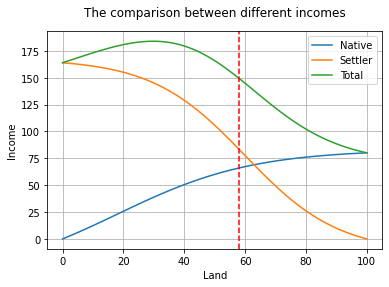

In [5]:
for income, label in zip(Incomes, Labels):
    plt.plot(land, income, label = label)
plt.legend()
plt.grid()
plt.xlabel('Land')
plt.ylabel('Income')
plt.title('The comparison between different incomes', pad=15, size=12)
plt.axvline(58, c='r', linestyle='--');

$\textbf{Note}:$ With current parameters, the land split in the Nash equilibrium is: $L_n = 57.9$ and $L_s = 42.1$.